Import packages and set paths

In [1]:
# Navigate to my EMC2 project data directory
import os
import sys
# Check current directory
print("Default directory:", os.getcwd())
# Change the current working directory to the home directory
os.chdir(os.path.expanduser("~"))
# Navigate to my ERA5 data directory
os.chdir('/g/data/jk72/ck4840/projects/emc2/data')
# Check current directory
print("Project directory:", os.getcwd())

Default directory: /home/581/ck4840
Project directory: /g/data/jk72/ck4840/projects/emc2/data


In [2]:
!conda info | grep 'active env'

     active environment : base
    active env location : /g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04


In [3]:
# Import modules
import emc2
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

First, we load model data (in this case, ModelE3) using the ModelE subclass object


In [4]:
print(os.getcwd())
os.chdir('/g/data/jk72/ck4840/projects/emc2/data/demo_notebook')
model_path = 'allsteps.allmergeSCM_AWARE_788.nc'
my_model = emc2.core.model.ModelE(model_path)
my_model.ds

/g/data/jk72/ck4840/projects/emc2/data


<xarray.Dataset>
Dimensions:    (time: 48, p: 110)
Coordinates:
    lon        float32 166.7
    lat        float32 -77.85
  * time       (time) datetime64[ns] 2016-08-16T01:15:00 ... 2016-08-17T00:45:00
  * p          (p) float32 979.0 969.0 959.0 949.0 ... 0.025 0.014 0.0075 0.0035
Data variables: (12/96)
    axyp       float32 dask.array<chunksize=(), meta=np.ndarray>
    prsurf     (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    gtempr     (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    shflx      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lhflx      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    ustar      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    ...         ...
    re_sspl    (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    re_sspi    (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dq_ls      (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dth_ls     (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dq_nudge   (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
    dth_nudge  (time, p) float32 dask.array<chunksize=(48, 110), meta=np.ndarray>
Attributes:
    xlabel:               SCM_AWARE_788 SCM_AWARE (AWARE case using the Singl...
    _file_dates:          ['20160816']
    _file_times:          ['011500']
    _datastream:          act_datastream
    _arm_standards_flag:  0

After that, we load in the HSRL data using the HSRL subclass object.


In [5]:
HSRL = emc2.core.instruments.HSRL('nsa')
HSRL.read_arm_netcdf_file('awrhsrlM1.20160816.100000.nc')  # raw or processed ARM or ARM-like data file
HSRL.ds

<xarray.Dataset>
Dimensions:                                (time: 120, mean_time: 120,
                                            altitude: 334, profile_time: 1)
Coordinates:
  * time                                   (time) datetime64[ns] 2016-08-16T1...
  * mean_time                              (mean_time) object 2016-08-16 10:0...
  * altitude                               (altitude) float32 0.0 ... 9.99e+03
Dimensions without coordinates: profile_time
Data variables: (12/26)
    base_time                              object ...
    first_time                             object ...
    last_time                              object ...
    latitude                               (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
    longitude                              (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
    od                                     (time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    ...                                     ...
    profile_beta_a_backscat_parallel       (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat_perpendicular          (time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    profile_beta_a_backscat_perpendicular  (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat                        (time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    profile_beta_a_backscat                (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    qc_mask                                (time, altitude) float64 dask.array<chunksize=(1, 334), meta=np.ndarray>
Attributes: (12/94)
    dpl_py_template:                                                         ...
    dpl_py_template_version:                                                 ...
    time_zone:                                                               ...
    codeversion:                                                             ...
    codedate:                                                                ...
    hsrl_instrument:                                                         ...
    ...                                                                                   ...
    hsrl_processing_parameter__wfov_corr__window_durration:                  ...
    hsrl_processing_parameter__wfov_corr__z_norm_interval:                   ...
    _file_dates:                                                             ...
    _file_times:                                                             ...
    _datastream:                                                             ...
    _arm_standards_flag:                                                     ...

The following command will generate and process 8 subcolumns per time period of simulated HSRL data using the default radiation approach and classify the simulator output.

In [1]:
my_model = emc2.simulator.main.make_simulated_data(my_model, HSRL, 8, do_classify=True, convert_zeros_to_nan=True)
my_model.ds

NameError: name 'emc2' is not defined

EMC2 can interact with the Atmospheric Community Toolkit to easily create visualizations. Alternatively, as in the observed and simulated examples below, one can use EMC2’s SubcolumnDisplay subclass object (of ACT’s Display class) to generate and save visualizations of both the observation and simulated variables. The SubcolumnDisplay plotting routine enables mask arrays to be applied on instrument variables; in this case, observed data is masked where the particulate optical thickness is greater than 4, providing a “cleaner” plot.

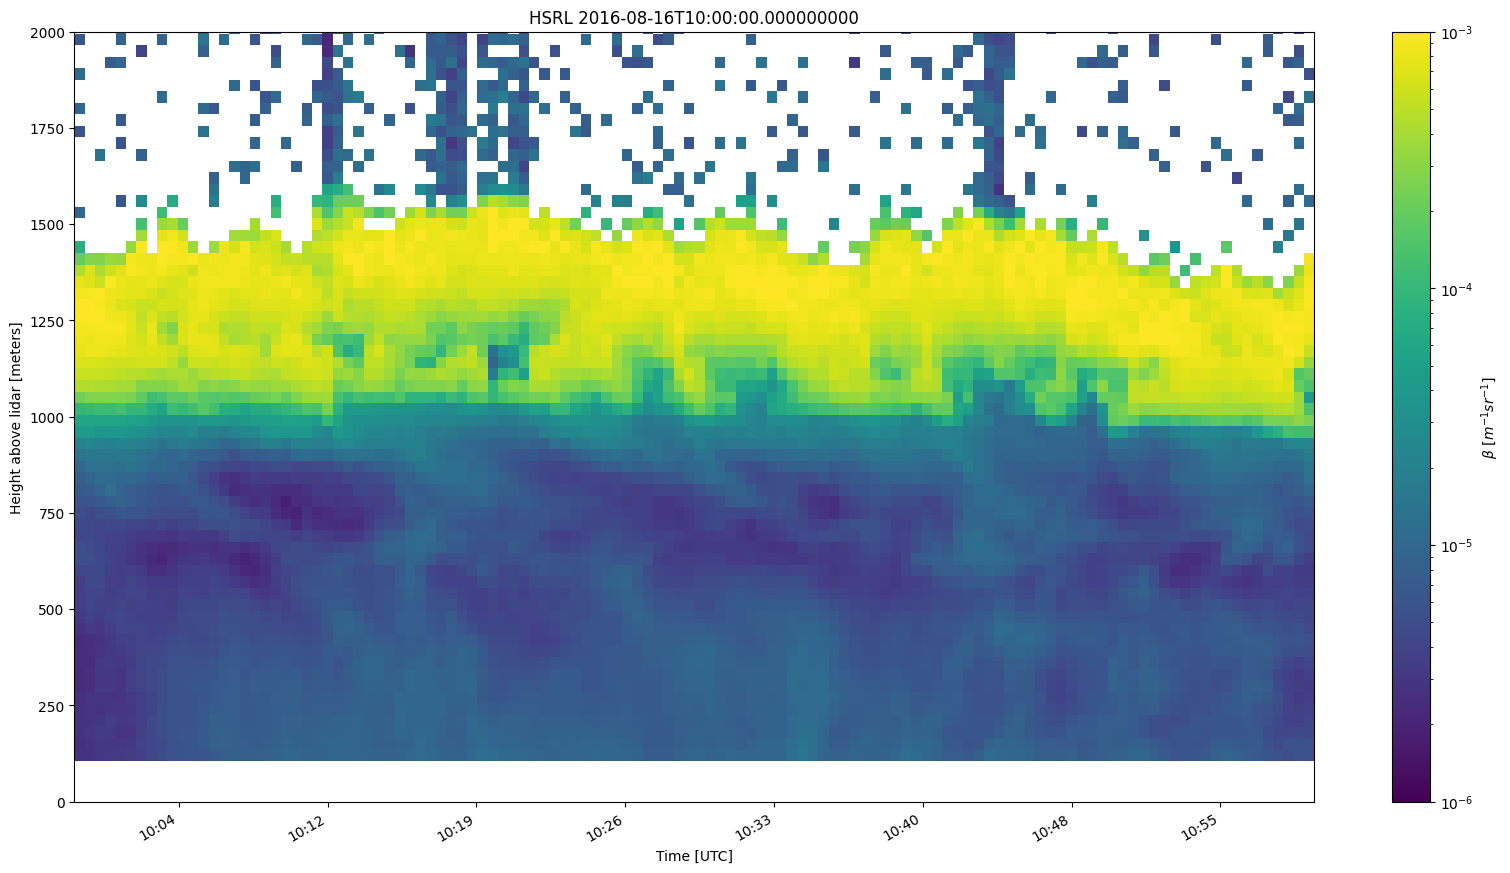

In [16]:
# print(os.getcwd())
display = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20, 10))
ax, _ = display.plot_instrument_timeseries(HSRL, "beta_a_backscat", log_plot=True, y_range=(0., 2000.),
                                           cmap="viridis", vmin=1e-6, vmax=1e-3,
                                           Mask_array=HSRL.ds["od_aerosol"] > 4.)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('/g/data/jk72/ck4840/projects/emc2/figs/demo_notebook/HSRL_backscatter.png', dpi=200)

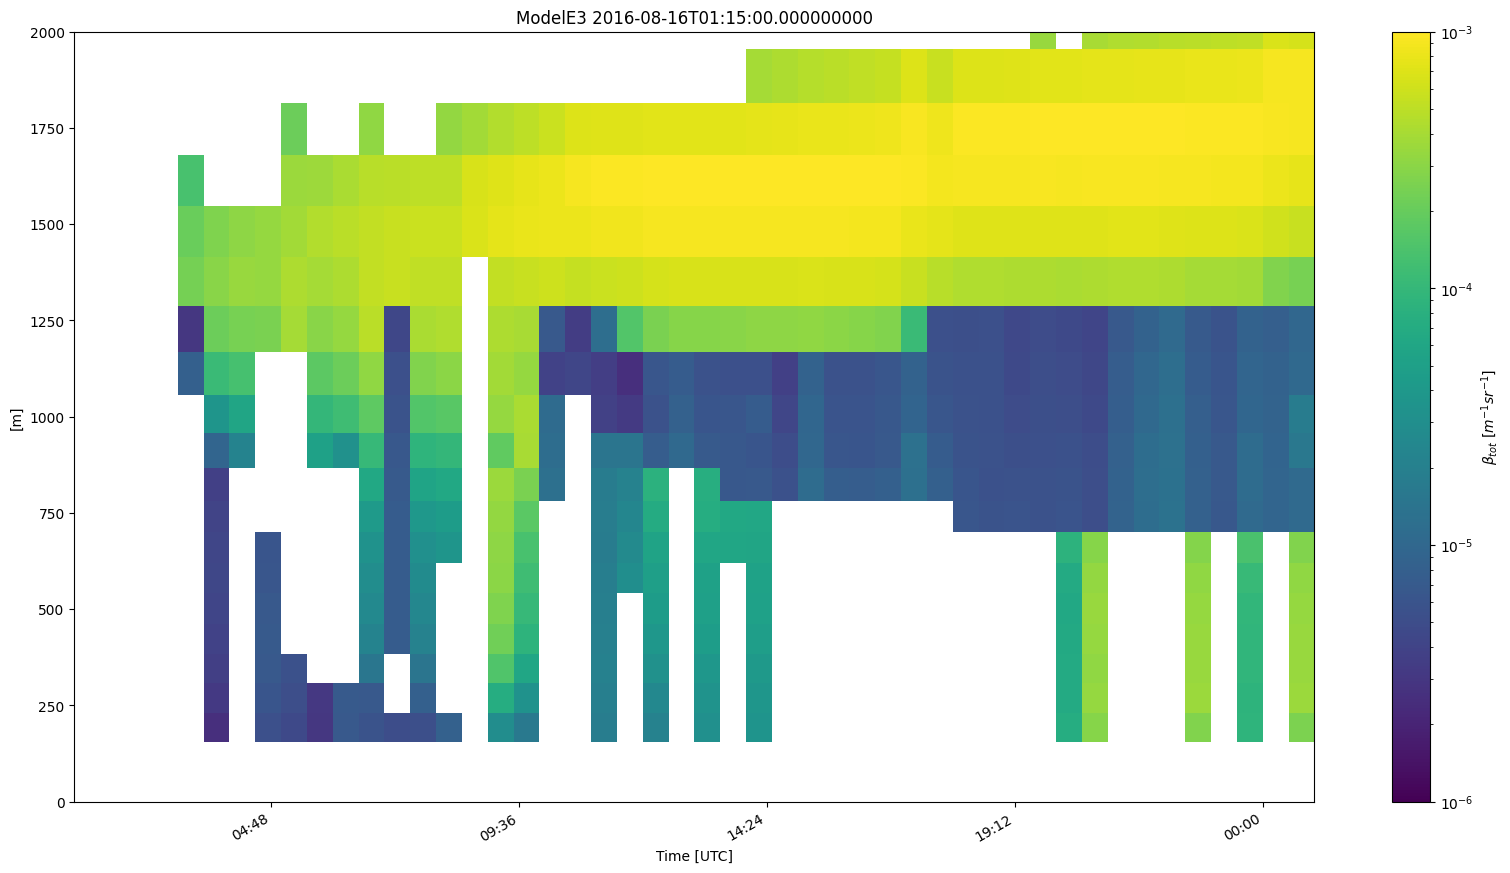

In [17]:
model_display = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20, 10))
ax_mod, _ = model_display.plot_subcolumn_timeseries("sub_col_beta_p_tot", 0, log_plot=True, y_range=(0., 2000.),
                                                 pressure_coords=False, cmap="viridis", vmin=1e-6, vmax=1e-3)
ax_mod.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
model_display.fig.savefig('/g/data/jk72/ck4840/projects/emc2/figs/demo_notebook/HSRL_backscatter_simulated.png', dpi=200)

We can also use EMC2’s SubcolumnDisplay object to generate profile plots with shaded regions designating variable temporal or spatial (based on all subcolumns) standard deviation.

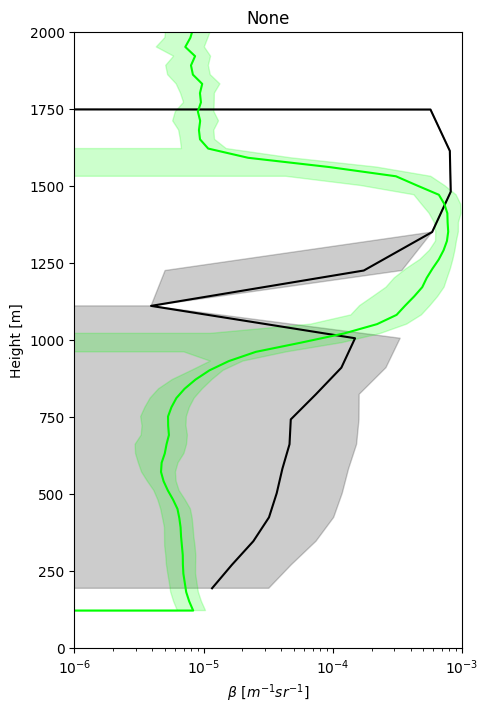

In [18]:
model_display_prof = emc2.plotting.SubcolumnDisplay(my_model, figsize=(5,8))
axp = model_display_prof.plot_subcolumn_mean_profile("sub_col_beta_p_tot", "2016-08-16T10:00:00", log_plot=True,
                                                     y_range=(0., 2000.), x_range=(1e-6, 1e-3), color='black',
                                                     pressure_coords=False, alpha=0.2)
axp = model_display_prof.plot_instrument_mean_profile(HSRL, "beta_a_backscat", log_plot=True,
                                                     Mask_array=HSRL.ds["od_aerosol"] > 4.,
                                                     y_range=(0., 2000.), x_range=(1e-6, 1e-3), color="lime",
                                                     pressure_coords=False, alpha=0.2)
model_display_prof.fig.savefig('/g/data/jk72/ck4840/projects/emc2/figs/demo_notebook/HSRL_backscatter_simulated_profile.png', dpi=200)

Finally, EMC2’s SubcolumnDisplay object also allows easy production of phase classification plots. Here we demonstrate curtain plots of lidar classificaiton for the first subcolumn and frequency phase ratio calculated using all subcolumn data.

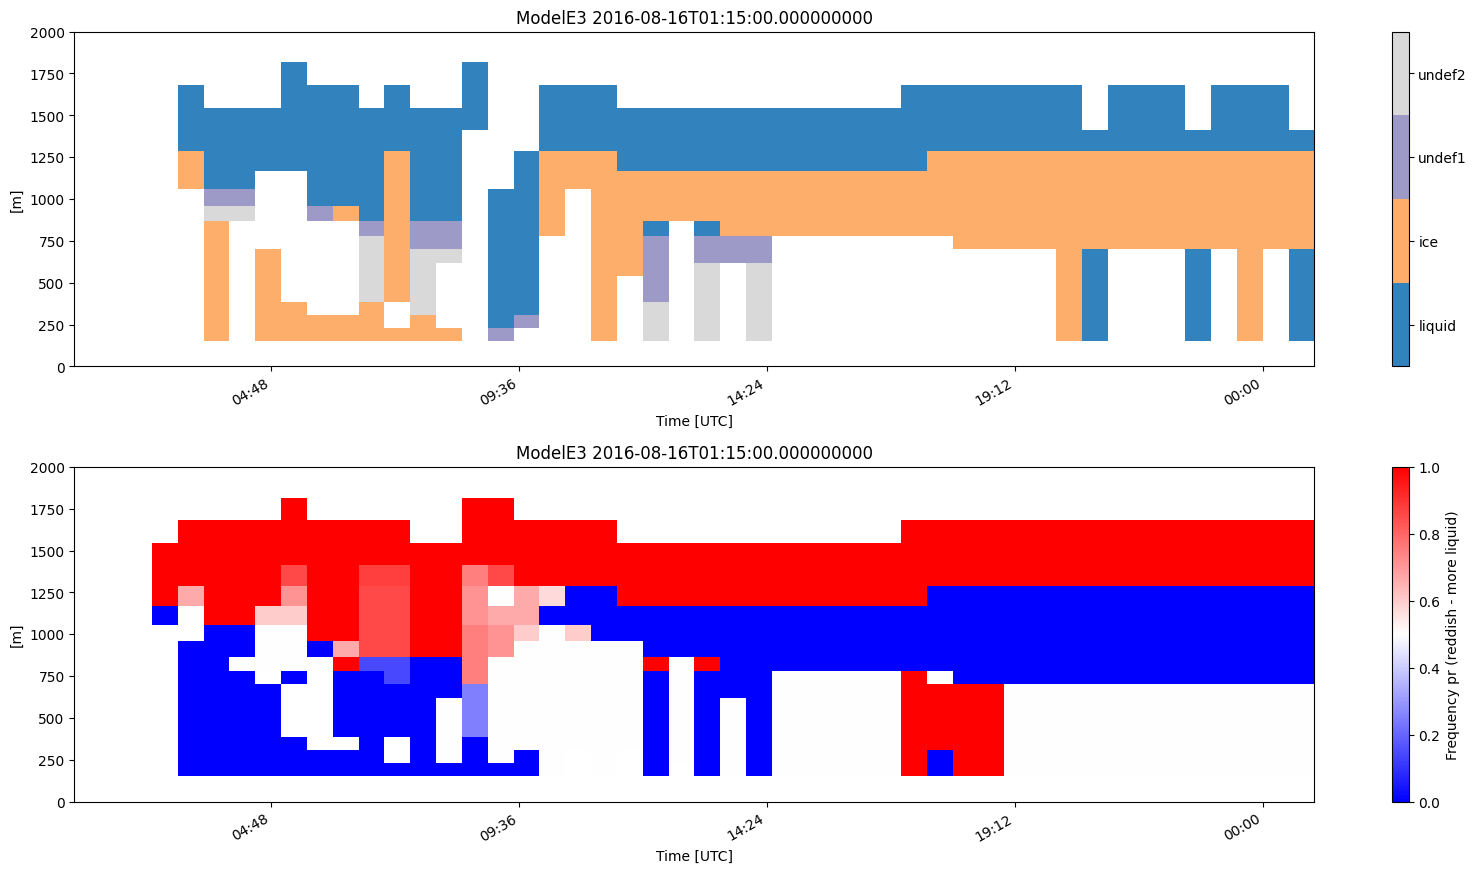

In [19]:
model_display2 = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20,10), subplot_shape=(2, 1))
ax2_1, cb2_1 = model_display2.plot_subcolumn_timeseries("phase_mask_HSRL_all_hyd", 0, y_range=(0., 2000.),
                                                 pressure_coords=False, subplot_index=0)
model_display.change_plot_to_class_mask(cb2_1, variable="phase_mask_HSRL_all_hyd", convert_zeros_to_nan=True)
ax2_1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

my_model = emc2.simulator.classification.calculate_phase_ratio(my_model, "phase_mask_HSRL_all_hyd", [1])
ax2_2, cb2_2 = model_display2.plot_subcolumn_timeseries("phase_mask_HSRL_all_hyd_fpr", 0, y_range=(0., 2000.),
                                                    pressure_coords=False, cmap="bwr", subplot_index=1,
                                                    cbar_label='Frequency pr (reddish - more liquid)')
ax2_2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.subplots_adjust(hspace=0.3)
model_display2.fig.savefig('/g/data/jk72/ck4840/projects/emc2/figs/demo_notebook/HSRL_backscatter_simulated_class.png', dpi=200)